# US Map and other

In [2]:
'''
File Name: Term Records
Contents of Files:
- Study 36404 -
Data Files Description
The data file contains one record for each separate term in prison. An individual person may have more than one record, but all will be assigned the same Abt_Inmate_ID value.
File Dimensions:
• No. of Cases: 10,907,333 • No. of Variables: 18
• Record Length: 54
• Records per Case: 1
• Overall No. of Records: 10,907,333
'''

import pandas as pd
import plotly

df = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0001/36404-0001-Data.dta')
print(df.head())


         ABT_INMATE_ID   SEX  \
0  A012015000000091071  Male   
1  A022015000000096906  Male   
2  A042015000000118649  Male   
3  A062015000000167469  Male   
4  A132015000000550479  Male   

                                             ADMTYPE OFFGENERAL EDUCATION  \
0                               New court commitment   Property         9   
1  Other admission (including unsentenced, transf...      Drugs         9   
2                               New court commitment    Violent         9   
3                           Parole return/revocation   Property         9   
4                               New court commitment    Violent         9   

  ADMITYR RELEASEYR  MAND_PRISREL_YEAR  PROJ_PRISREL_YEAR  PARELIG_YEAR  \
0    2006      2010                NaN                NaN           NaN   
1    2008      2008                NaN                NaN           NaN   
2    2013      2014             2014.0             2014.0           NaN   
3    1996      1996                NaN      

In [81]:
#getting the total number of prisoners of an age and total number of recidicts of an age
#in Mass

agetotals = [0,0,0,0,0]
ageredict = [0,0,0,0,0]
labels = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55+ years']

dfcopy = df.copy()
dfcopy = dfcopy.query('STATE == "Massachusetts"')
dfcopy = dfcopy.query('AGEADMIT == "18-24 years"')
agetotals[0] = dfcopy['SEX'].count()
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        ageredict[0] += 1
        
dfcopy = df.copy()
dfcopy = dfcopy.query('STATE == "Massachusetts"')
dfcopy = dfcopy.query('AGEADMIT == "25-34 years"')
agetotals[1] = dfcopy['SEX'].count()
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        ageredict[1] += 1
        
dfcopy = df.copy()
dfcopy = dfcopy.query('STATE == "Massachusetts"')
dfcopy = dfcopy.query('AGEADMIT == "35-44 years"')
agetotals[2] = dfcopy['SEX'].count()
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        ageredict[2] += 1
    
dfcopy = df.copy()
dfcopy = dfcopy.query('STATE == "Massachusetts"')
dfcopy = dfcopy.query('AGEADMIT == "45-54 years"')
agetotals[3] = dfcopy['SEX'].count()
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        ageredict[3] += 1

dfcopy = df.copy()
dfcopy = dfcopy.query('STATE == "Massachusetts"')
dfcopy = dfcopy.query('AGEADMIT == "55+ years"')
agetotals[4] = dfcopy['SEX'].count()
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        ageredict[4] += 1
        
print(agetotals)
print(ageredict)

[5327, 9873, 6512, 3606, 1111]
[154, 457, 278, 127, 33]


['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55+ years']
[5327, 9873, 6512, 3606, 1111]


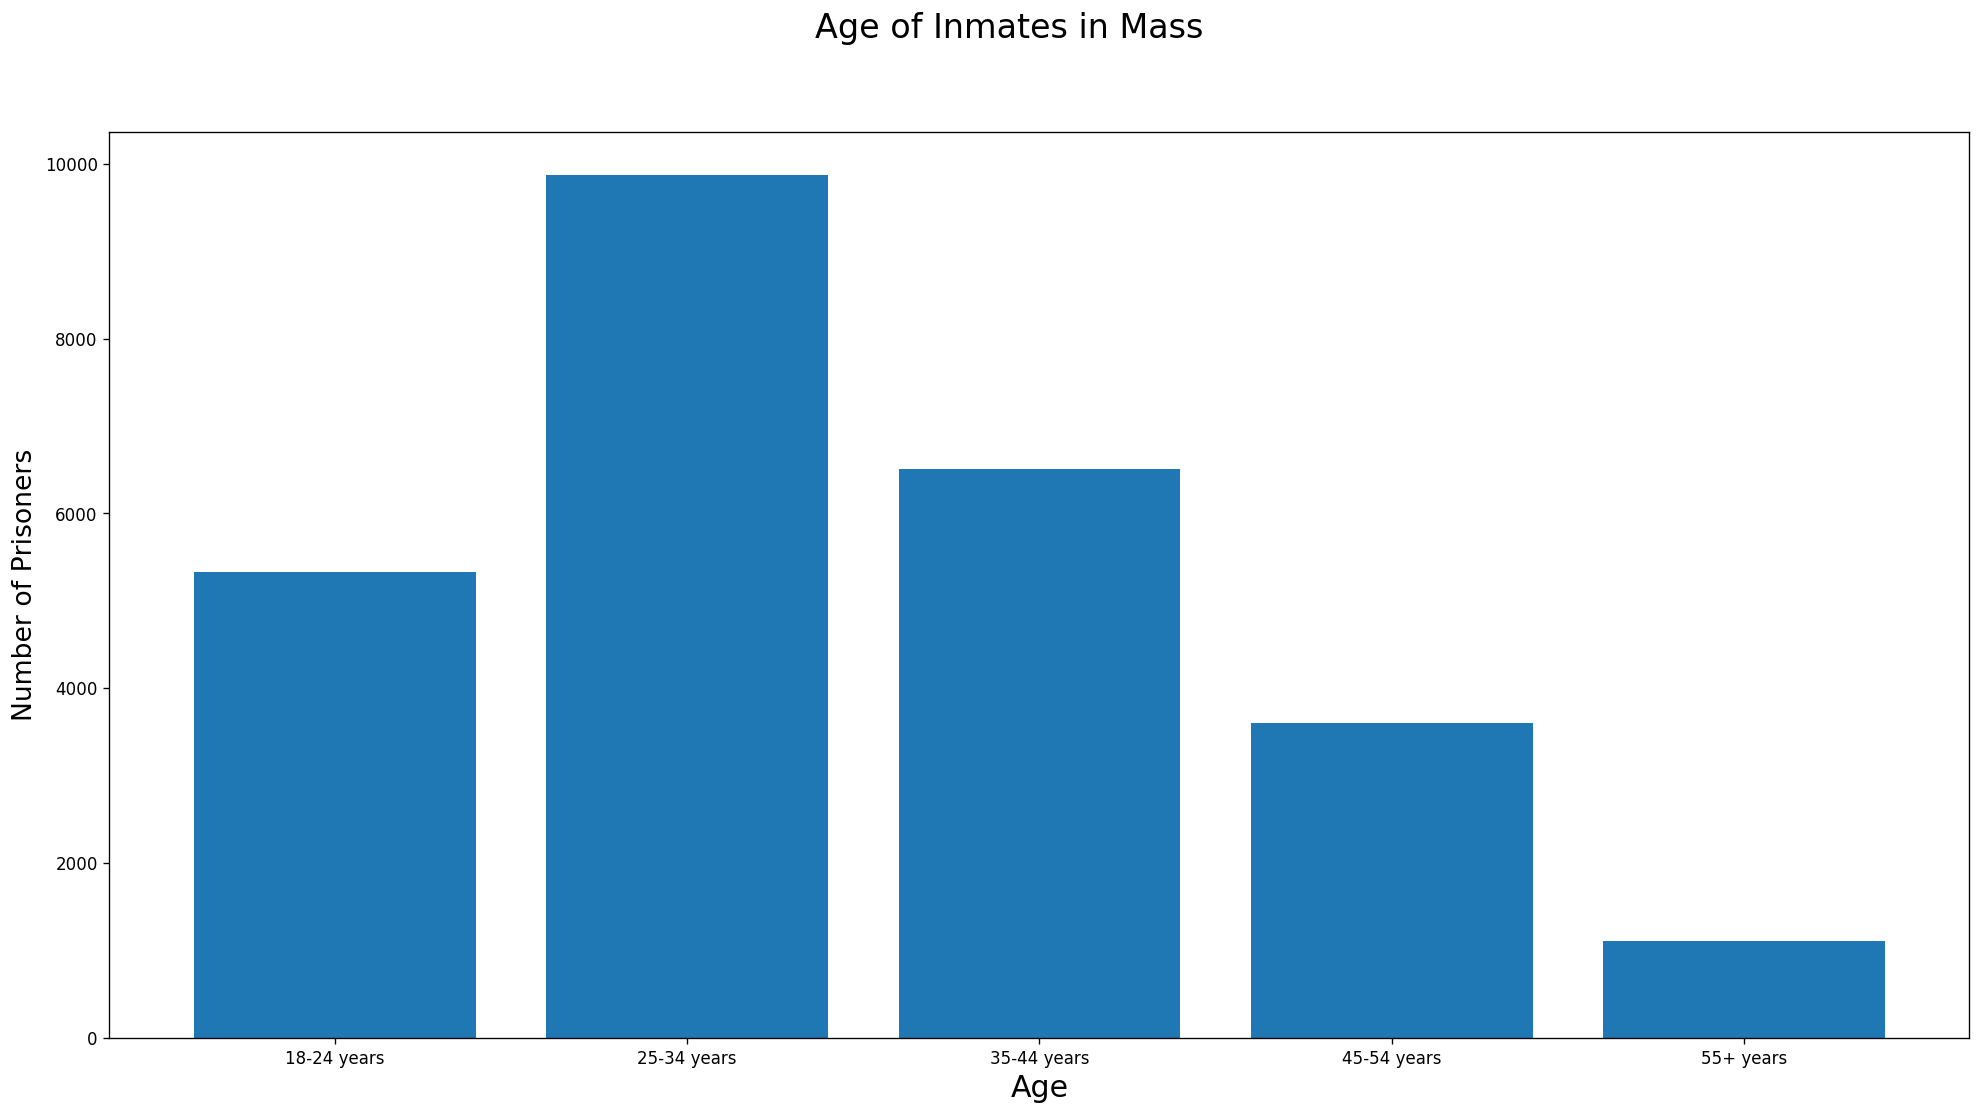

In [85]:
#plots number of prisoners by age
#categorical X was not working for this
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

totaldict = {}
redictdict = {}
for index in range(len(agetotals)):
    totaldict[labels[index]] = agetotals[index]
    redictdict[labels[index]] = ageredict[index]
    
names = list(totaldict.keys())
values = list(totaldict.values())

print(names)
print(values)
plt.figure(figsize=(20,10), dpi = 120)
plt.bar(np.arange(5), values)
plt.xticks(np.arange(5), names)

#plt.bar(years, vector)
#plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.suptitle("Age of Inmates in Mass", fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Prisoners', fontsize=16)

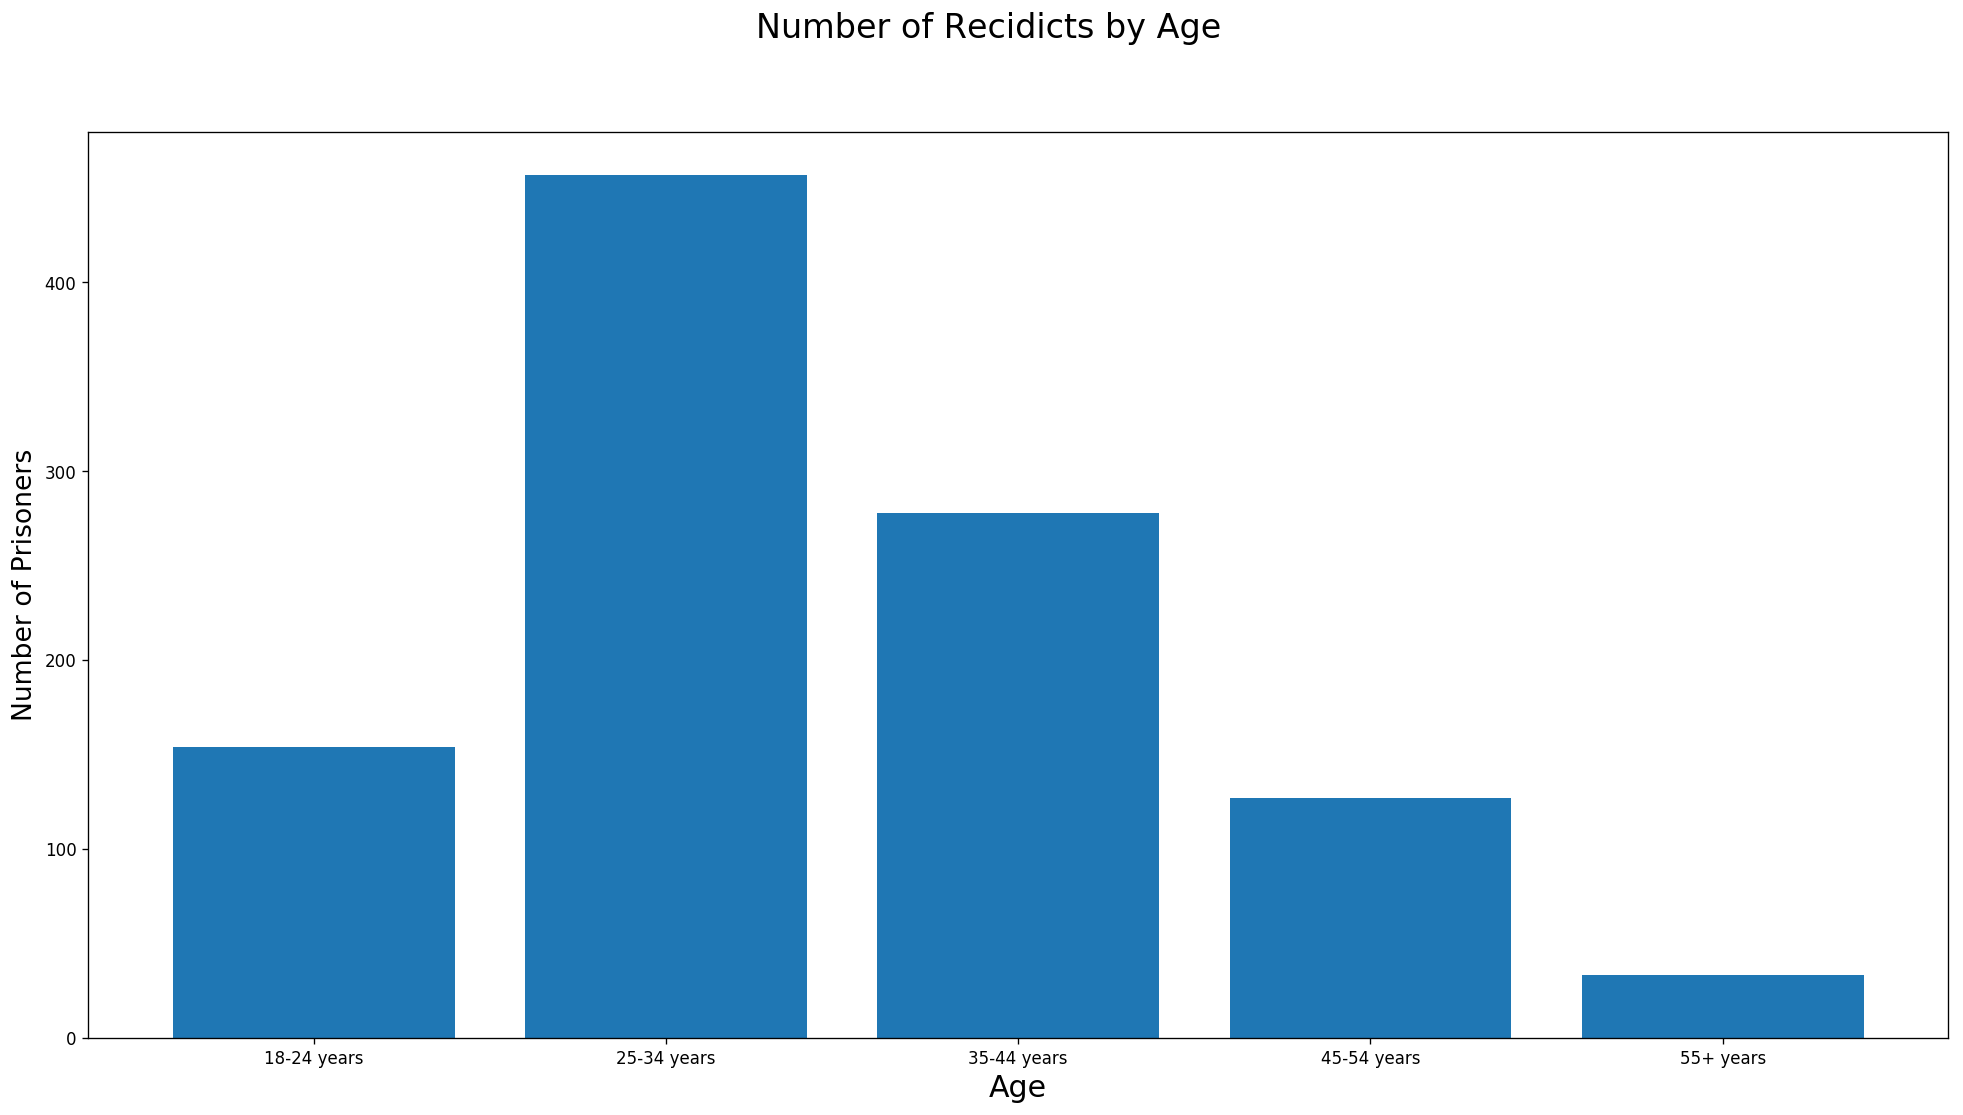

In [88]:
#number of recidicts by age
plt.figure(figsize=(20,10), dpi = 120)
plt.bar(np.arange(5), ageredict)
plt.xticks(np.arange(5), names)
plt.suptitle("Number of Recidicts by Age", fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Prisoners', fontsize=16)

<Container object of 5 artists>

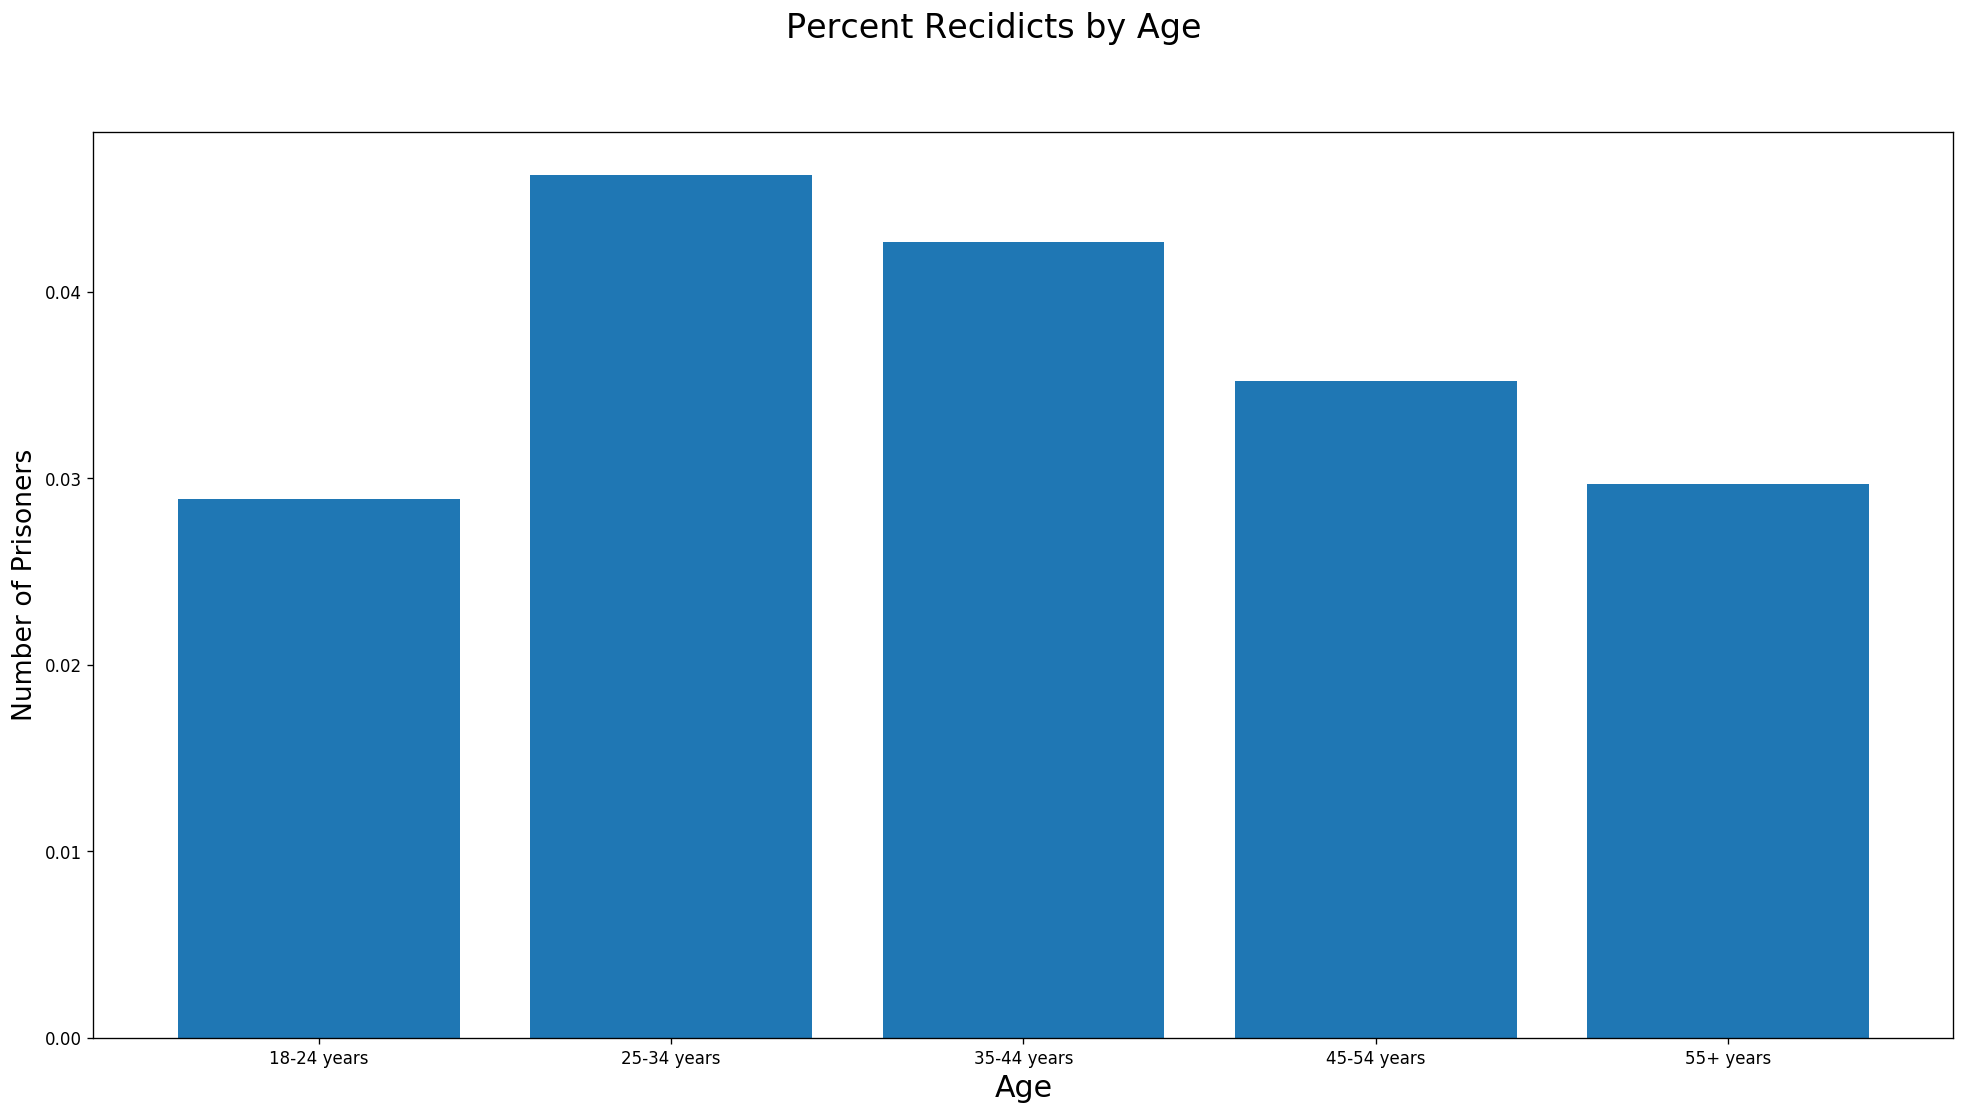

In [89]:
#percent recidicts by age
percent = []
for index in range(len(ageredict)):
    percent.append(ageredict[index]/agetotals[index])

plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Percent Recidicts by Age", fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Prisoners', fontsize=16)
plt.xticks(np.arange(5), names)
plt.bar(np.arange(5), percent)

In [76]:
#getting the number of elderly recidicts by race
totalracecount = [0,0,0,0,0]
wcrimelist = []
bcrimelist = []
hcrimelist = []
ocrimelist = []
mcrimelist = []
dfcopy = df.copy()
dfcopy = dfcopy.query('AGEADMIT == "55+ years"')
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        if (group['RACE'].values[0] == 'White, non-Hispanic'):
            wcrimelist.append(group['OFFGENERAL'].values[0])
            wcrimelist.append(group['OFFGENERAL'].values[1])
            
            wcrimedetail.append(group['OFFDETAIL'].values[0])
            wcrimedetail.append(group['OFFDETAIL'].values[1])
            totalracecount[0]+=1
        elif (group['RACE'].values[0] == 'Black, non-Hispanic'):
            bcrimelist.append(group['OFFGENERAL'].values[0])
            bcrimelist.append(group['OFFGENERAL'].values[1])
            
            bcrimedetail.append(group['OFFDETAIL'].values[0])
            bcrimedetail.append(group['OFFDETAIL'].values[1])
            totalracecount[1]+=1
        elif (group['RACE'].values[0] == 'Hispanic, any race'):
            hcrimelist.append(group['OFFGENERAL'].values[0])
            hcrimelist.append(group['OFFGENERAL'].values[1])
            
            hcrimedetail.append(group['OFFDETAIL'].values[0])
            hcrimedetail.append(group['OFFDETAIL'].values[1])
            totalracecount[2]+=1
        elif (group['RACE'].values[0] == 'Other race(s), non-Hispanic'):
            ocrimelist.append(group['OFFGENERAL'].values[0])
            ocrimelist.append(group['OFFGENERAL'].values[1])
            
            ocrimedetail.append(group['OFFDETAIL'].values[0])
            ocrimedetail.append(group['OFFDETAIL'].values[1])
            totalracecount[3]+=1
        elif (group['RACE'].values[0] == 'Missing'):
            mcrimelist.append(group['OFFGENERAL'].values[0])
            mcrimelist.append(group['OFFGENERAL'].values[1])
            
            mcrimedetail.append(group['OFFDETAIL'].values[0])
            mcrimedetail.append(group['OFFDETAIL'].values[1])
            totalracecount[4]+=1
print(totalracecount)
#print(wcrimelist)

[16031, 15791, 5013, 816, 2555]


In [77]:
print("Most common crime among white elderly prisoners in US with 2 sentences: " + most_common(wcrimelist))
print("Most common crime detail among white elderly prisoners in US with 2 sentences: " + most_common(wcrimedetail))

print("Most common crime among black elderly prisoners in US with 2 sentences: " + most_common(bcrimelist))
print("Most common crime detail among black elderly prisoners in US with 2 sentences: " + most_common(bcrimedetail))

print("Most common crime among hispanic elderly prisoners in US with 2 sentences: " + most_common(hcrimelist))
print("Most common crime detail among hispanic elderly prisoners in US with 2 sentences: " + most_common(hcrimedetail))

print("Most common crime among other elderly prisoners in US with 2 sentences: " + most_common(ocrimelist))
print("Most common crime detail among other elderly prisoners in US with 2 sentences: " + most_common(ocrimedetail))

print("Most common crime among missing elderly prisoners in US with 2 sentences: " + most_common(mcrimelist))
print("Most common crime detail among missing elderly prisoners in US with 2 sentences: " + most_common(mcrimedetail))

Most common crime among white elderly prisoners in US with 2 sentences: Public order
Most common crime detail among white elderly prisoners in US with 2 sentences: Public order
Most common crime among black elderly prisoners in US with 2 sentences: Drugs
Most common crime detail among black elderly prisoners in US with 2 sentences: Drugs (includes possession, distribution, trafficking, other)
Most common crime among hispanic elderly prisoners in US with 2 sentences: Drugs
Most common crime detail among hispanic elderly prisoners in US with 2 sentences: Drugs (includes possession, distribution, trafficking, other)
Most common crime among other elderly prisoners in US with 2 sentences: Public order
Most common crime detail among other elderly prisoners in US with 2 sentences: Public order
Most common crime among missing elderly prisoners in US with 2 sentences: Property
Most common crime detail among missing elderly prisoners in US with 2 sentences: Drugs (includes possession, distributi

<Container object of 5 artists>

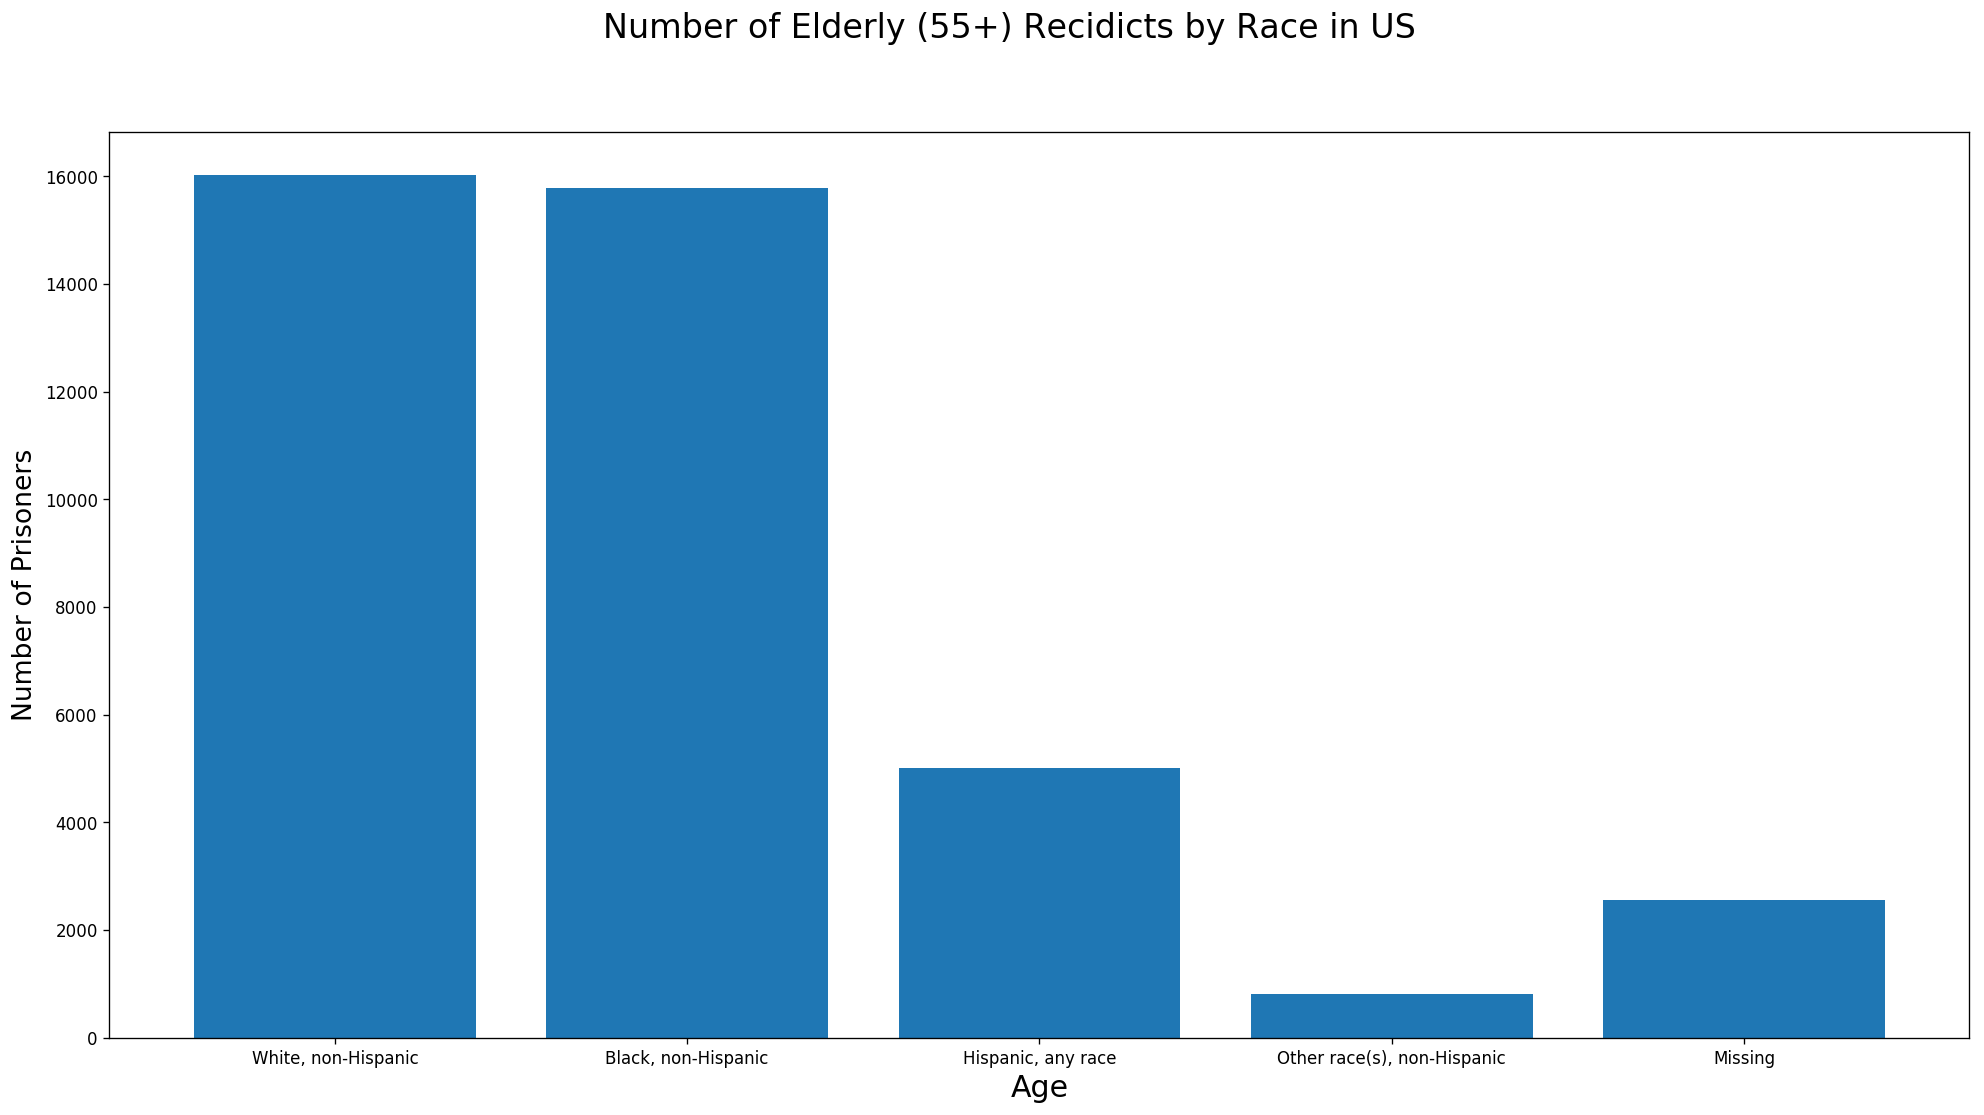

In [91]:
race = ["White, non-Hispanic", 'Black, non-Hispanic', 'Hispanic, any race', 'Other race(s), non-Hispanic', 'Missing']
#getting the number of elderly recidicts by race
plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Number of Elderly (55+) Recidicts by Race in US", fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Prisoners', fontsize=16)
plt.xticks(np.arange(5), race)
plt.bar(np.arange(5), totalracecount)
#0 is White, non-Hispanic, 
#1 is Black, non-Hispanic and so on

In [78]:
#getting number of elderly recidicts in Mass by race
racecount = [0,0,0,0,0]
wcrimelist = []
bcrimelist = []
hcrimelist = []
ocrimelist = []
mcrimelist = []

wcrimedetail = []
bcrimedetail = []
hcrimedetail = []
ocrimedetail = []
mcrimedetail = []
dfcopy = df.copy()
dfcopy = dfcopy.query('STATE == "Massachusetts"')
dfcopy = dfcopy.query('AGEADMIT == "55+ years"')
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2: 
    if (group['SEX'].count() > 1):
        if (group['RACE'].values[0] == 'White, non-Hispanic'):
            wcrimelist.append(group['OFFGENERAL'].values[0])
            wcrimelist.append(group['OFFGENERAL'].values[1])
            wcrimedetail.append(group['OFFDETAIL'].values[0])
            wcrimedetail.append(group['OFFDETAIL'].values[1])
            racecount[0]+=1
        elif (group['RACE'].values[0] == 'Black, non-Hispanic'):
            bcrimelist.append(group['OFFGENERAL'].values[0])
            bcrimelist.append(group['OFFGENERAL'].values[1])
            bcrimedetail.append(group['OFFDETAIL'].values[0])
            bcrimedetail.append(group['OFFDETAIL'].values[1])
            racecount[1]+=1
        elif (group['RACE'].values[0] == 'Hispanic, any race'):
            hcrimelist.append(group['OFFGENERAL'].values[0])
            hcrimelist.append(group['OFFGENERAL'].values[1])
            hcrimedetail.append(group['OFFDETAIL'].values[0])
            hcrimedetail.append(group['OFFDETAIL'].values[1])
            racecount[2]+=1
        elif (group['RACE'].values[0] == 'Other race(s), non-Hispanic'):
            ocrimelist.append(group['OFFGENERAL'].values[0])
            ocrimelist.append(group['OFFGENERAL'].values[1])
            ocrimedetail.append(group['OFFDETAIL'].values[0])
            ocrimedetail.append(group['OFFDETAIL'].values[1])
            racecount[3]+=1
        elif (group['RACE'].values[0] == 'Missing'):
            mcrimelist.append(group['OFFGENERAL'].values[0])
            mcrimelist.append(group['OFFGENERAL'].values[1])
            mcrimedetail.append(group['OFFDETAIL'].values[0])
            mcrimedetail.append(group['OFFDETAIL'].values[1])
            racecount[4]+=1
print(racecount)
print(wcrimelist)
print(wcrimedetail)



[20, 7, 2, 0, 4]
['Drugs', 'Drugs', 'Violent', 'Violent', 'Public order', 'Public order', 'Public order', 'Public order', 'Violent', 'Violent', 'Public order', 'Public order', 'Violent', 'Violent', 'Public order', 'Public order', 'Property', 'Property', 'Property', 'Property', 'Public order', 'Public order', 'Property', 'Property', 'Drugs', 'Drugs', 'Public order', 'Public order', 'Violent', 'Violent', 'Drugs', 'Drugs', 'Public order', 'Public order', 'Violent', 'Violent', 'Violent', 'Violent', 'Violent', 'Violent']
['Drugs (includes possession, distribution, trafficking, other)', 'Drugs (includes possession, distribution, trafficking, other)', 'Rape/sexual assault', 'Rape/sexual assault', 'Public order', 'Public order', 'Public order', 'Public order', 'Murder (including non-negligent manslaughter)', 'Murder (including non-negligent manslaughter)', 'Public order', 'Public order', 'Murder (including non-negligent manslaughter)', 'Murder (including non-negligent manslaughter)', 'Public o

In [79]:
import itertools
import operator

def most_common(L):
    # get an iterable of (item, iterable) pairs
    SL = sorted((x, i) for i, x in enumerate(L))
    # print 'SL:', SL
    groups = itertools.groupby(SL, key=operator.itemgetter(0))
    # auxiliary function to get "quality" for an item
    def _auxfun(g):
        item, iterable = g
        count = 0
        min_index = len(L)
        for _, where in iterable:
            count += 1
            min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
        return count, -min_index
  # pick the highest-count/earliest item
    return max(groups, key=_auxfun)[0]

print("Most common crime among white elderly prisoners in Massachusetts with 2 sentences: " + most_common(wcrimelist))
print("Most common crime detail among white elderly prisoners in Massachusetts with 2 sentences: " + most_common(wcrimedetail))

print("Most common crime among black elderly prisoners in Massachusetts with 2 sentences: " + most_common(bcrimelist))
print("Most common crime detail among black elderly prisoners in Massachusetts with 2 sentences: " + most_common(bcrimedetail))

print("Most common crime among hispanic elderly prisoners in Massachusetts with 2 sentences: " + most_common(hcrimelist))
print("Most common crime detail among hispanic elderly prisoners in Massachusetts with 2 sentences: " + most_common(hcrimedetail))

#print("Most common crime among other elderly prisoners in Massachusetts:" + most_common(ocrimelist))
#print("Most common crime detail among other elderly prisoners in Massachusetts:" + most_common(ocrimedetail))

print("Most common crime among missing elderly prisoners in Massachusetts with 2 sentences: " + most_common(mcrimelist))
print("Most common crime detail among missing elderly prisoners in Massachusetts with 2 sentences: " + most_common(mcrimedetail))

Most common crime among white elderly prisoners in Massachusetts with 2 sentences: Violent
Most common crime detail among white elderly prisoners in Massachusetts with 2 sentences: Public order
Most common crime among black elderly prisoners in Massachusetts with 2 sentences: Violent
Most common crime detail among black elderly prisoners in Massachusetts with 2 sentences: Robbery
Most common crime among hispanic elderly prisoners in Massachusetts with 2 sentences: Drugs
Most common crime detail among hispanic elderly prisoners in Massachusetts with 2 sentences: Drugs (includes possession, distribution, trafficking, other)
Most common crime among missing elderly prisoners in Massachusetts with 2 sentences: Violent
Most common crime detail among missing elderly prisoners in Massachusetts with 2 sentences: Drugs (includes possession, distribution, trafficking, other)


<Container object of 5 artists>

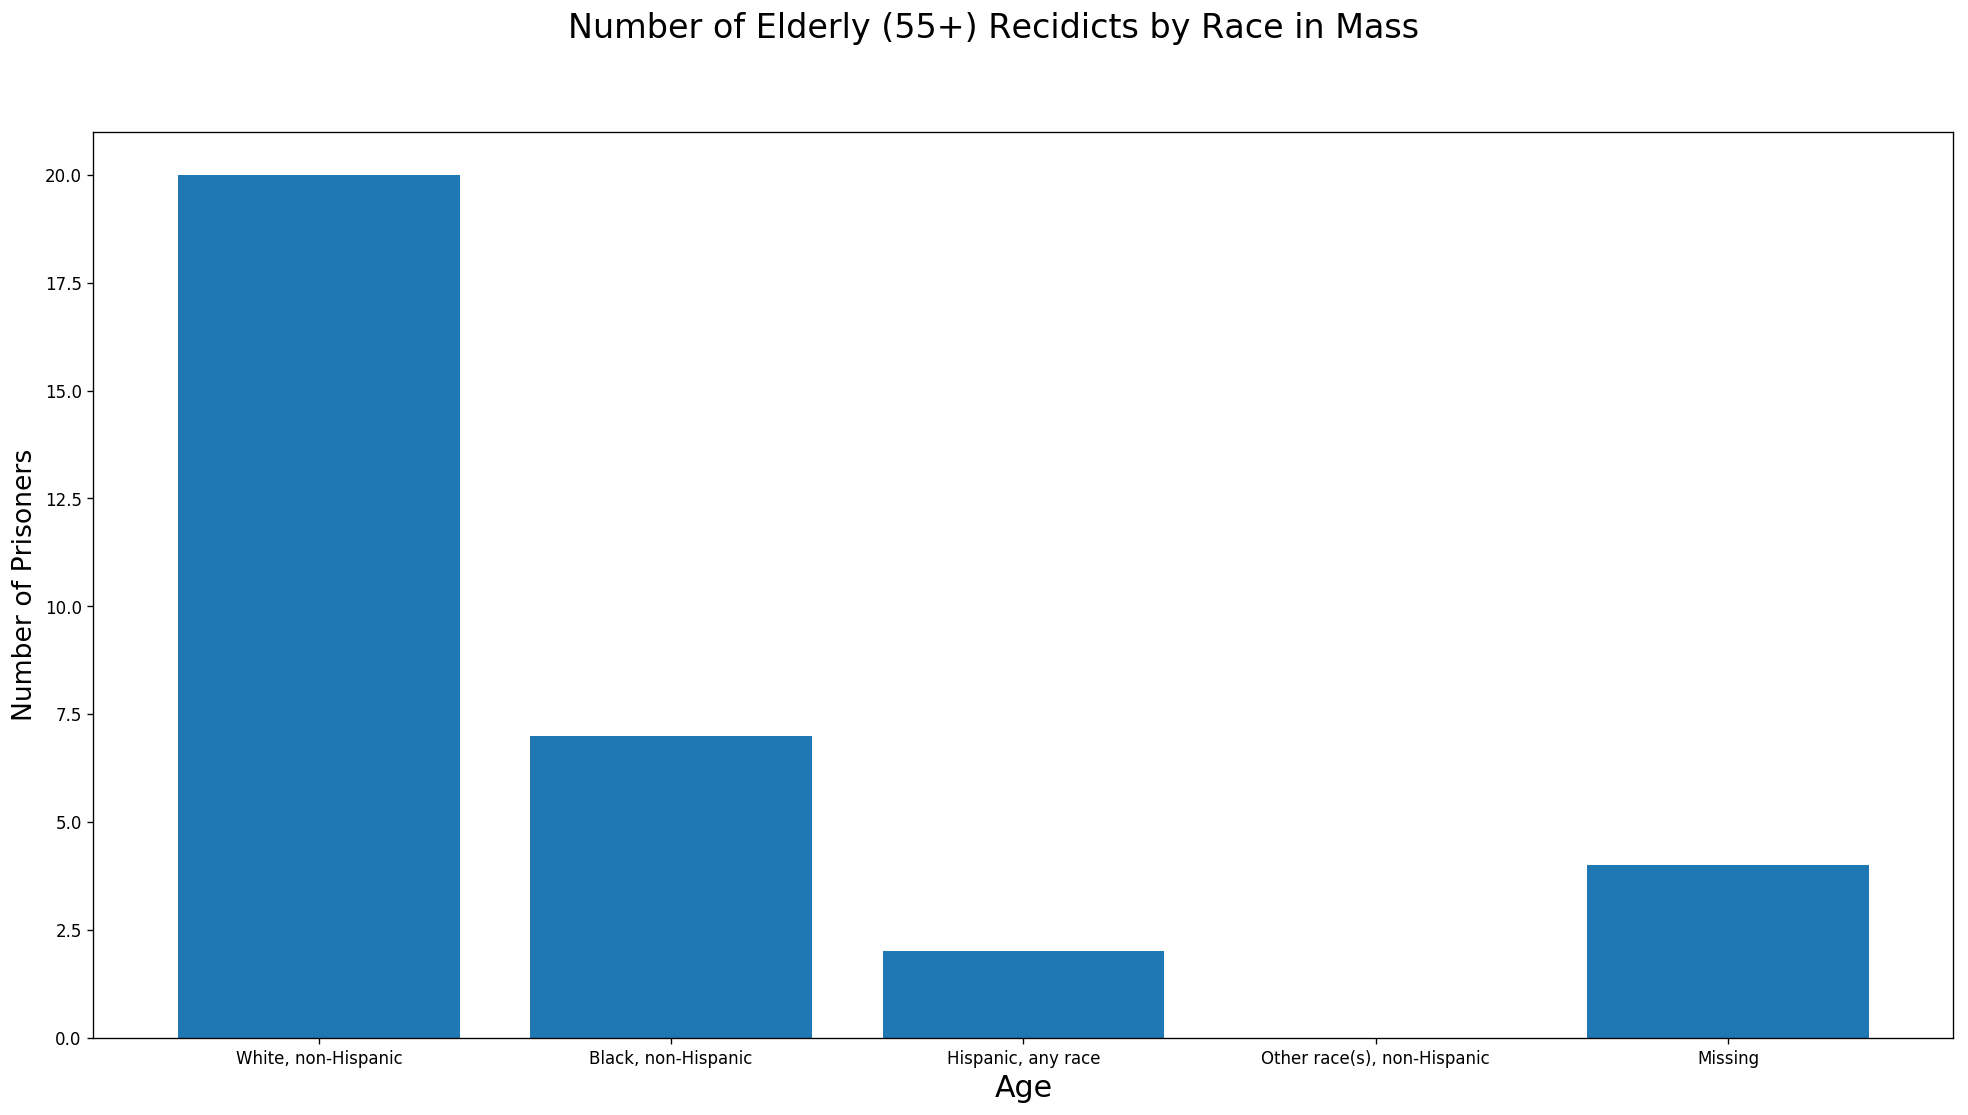

In [92]:
#getting number of elderly recidicts in Mass by race

plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Number of Elderly (55+) Recidicts by Race in Mass", fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Prisoners', fontsize=16)
plt.xticks(np.arange(5), race)

plt.bar(np.arange(5), racecount)

# Idea 3:

Look at education levels in elderly compared to others in prison, in mass. Do the elderly have more, less, or similar education? 
Future question (not in the report): Does this have a correlation to a crime?

Right now, we are having difficulty displaying the information. We will fix this for the next report.

In [94]:
'''
File Name: Prison Admissions
Contents of Files:
The data file contains one record for each admission to prison. An individual person may have more than one record if s/he was admitted more than once.
File Dimensions:
• No. of Cases: 13,815,009 • No. of Variables: 14
• Record Length: 31
• Records per Case: 1
• Overall No. of Records: 13,815,009
'''
df2 = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0002/36404-0002-Data.dta')
df2.head()

,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT
0,Male,1991,Alabama,HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1991.0,2-4.9 years,Burglary,"Black, non-Hispanic",18-24 years
1,Female,1991,Alabama,<HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1991.0,< 1 year,Larceny,"Black, non-Hispanic",18-24 years
2,Male,1991,Alabama,Ungraded/unknown,New court commitment,Drugs,NaN,NaN,NaN,1991.0,2-4.9 years,"Drugs (includes possession, distribution, traf...","Black, non-Hispanic",25-34 years
3,Male,1991,Alabama,HS diploma/GED,New court commitment,Public order,NaN,NaN,NaN,1991.0,5-9.9 years,Public order,"White, non-Hispanic",18-24 years
4,Male,1991,Alabama,<HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1991.0,5-9.9 years,Larceny,"Black, non-Hispanic",18-24 years


(1992, 'White, non-Hispanic')
58
(1992, 'Black, non-Hispanic')
9
(1992, 'Hispanic, any race')
4
(1992, 'Missing')
1
(1993, 'White, non-Hispanic')
55
(1993, 'Black, non-Hispanic')
7
(1993, 'Hispanic, any race')
11
(1993, 'Missing')
2
(1994, 'White, non-Hispanic')
56
(1994, 'Black, non-Hispanic')
10
(1994, 'Hispanic, any race')
4
(1994, 'Other race(s), non-Hispanic')
1
(1994, 'Missing')
6
(1995, 'White, non-Hispanic')
43
(1995, 'Black, non-Hispanic')
5
(1995, 'Hispanic, any race')
5
(2010, 'White, non-Hispanic')
79
(2010, 'Black, non-Hispanic')
14
(2010, 'Hispanic, any race')
13
(2010, 'Other race(s), non-Hispanic')
3
(2010, 'Missing')
14
(2011, 'White, non-Hispanic')
74
(2011, 'Black, non-Hispanic')
25
(2011, 'Hispanic, any race')
20
(2011, 'Other race(s), non-Hispanic')
2
(2011, 'Missing')
20
(2012, 'White, non-Hispanic')
96
(2012, 'Black, non-Hispanic')
25
(2012, 'Hispanic, any race')
16
(2012, 'Other race(s), non-Hispanic')
4
(2012, 'Missing')
21
(2013, 'White, non-Hispanic')
95
(201

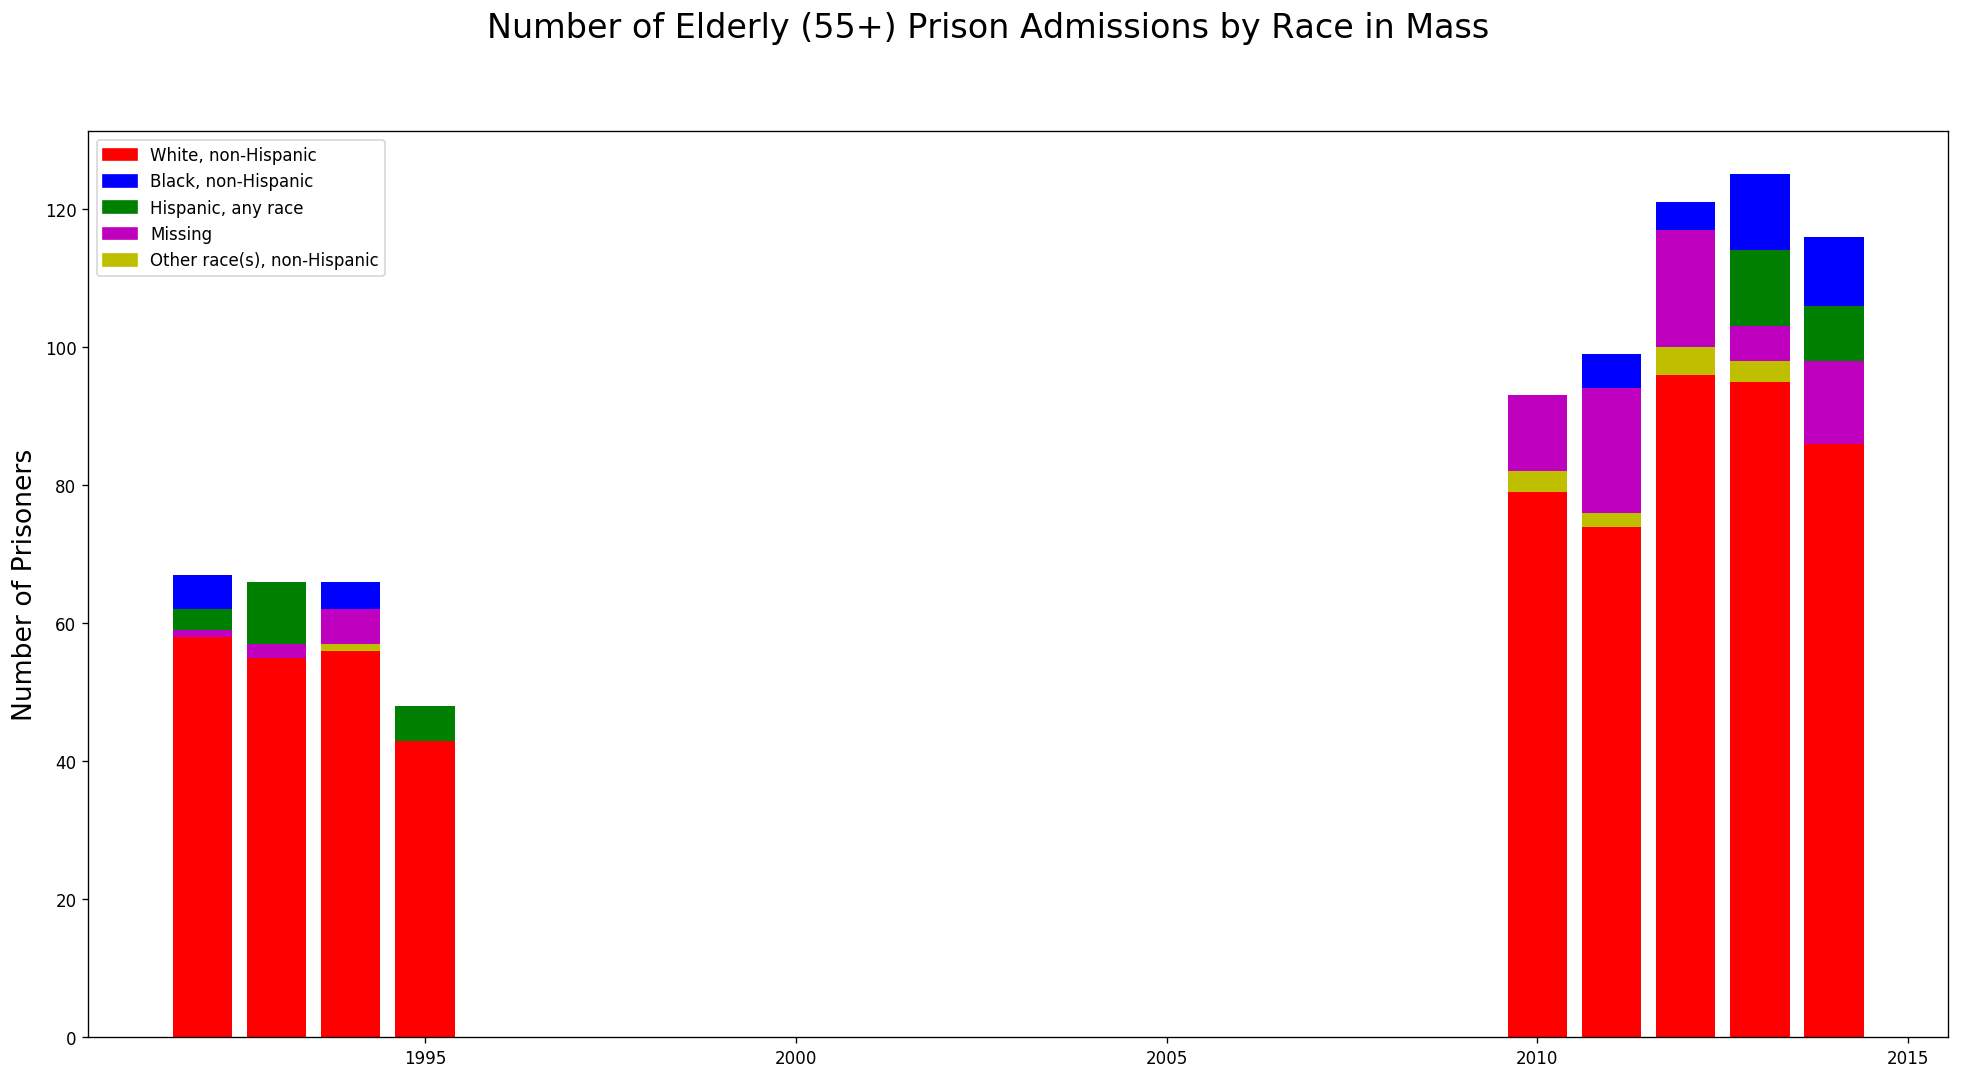

In [96]:
#gets the number of prison admissions by year by race
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

df2copy = df2.copy()
df2copy = df2copy.query('STATE == "Massachusetts"')
df2copy.head()
df2copy = df2copy.query('AGEADMIT == "55+ years"')
grouped = df2copy.groupby(['RPTYEAR', 'RACE'])
yeardict = {}
for name, group in grouped:
    print(name)
    if (name[0] not in yeardict):
        yeardict[name[0]] = []
    yeardict[name[0]].append([name[1], int(group[['SEX']].count().values)])
    print(int(group[['SEX']].count().values))
    #print((group.count()))

print(yeardict)

yearlist = []


counter = 0
whitelist = []
blacklist = []
hislist = []
mislist = []
otherlist = []
for key, value in yeardict.items():
    print (key)
    sum1 = 0
    otherbool = False
    misbool = False
    for item in value:
        sum1 += (item[1])
    #print(sum1)
    yearlist.append(key)
    for item in value:
        if item[0] == 'White, non-Hispanic':
            whitelist.append(item[1])
        elif item[0] == 'Black, non-Hispanic':
            blacklist.append(item[1])
        elif item[0] == 'Hispanic, any race':
            hislist.append(item[1])
        elif item[0] == 'Missing':
            mislist.append(item[1])
            misbool = True
        elif item[0] == 'Other race(s), non-Hispanic':
            otherlist.append(item[1])
            otherbool = True
        
        print("% of inmates with race " + item[0] + " = %.2f" % (item[1]/sum1))
    counter+=1
    if otherbool == False:
        otherlist.append(0)
    if misbool == False:
        mislist.append(0)
print(yearlist)

print(whitelist)
print(blacklist)
print(hislist)
print(mislist)
print(otherlist)


plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Number of Elderly (55+) Prison Admissions by Race in Mass", fontsize=20)
plt.ylabel('Number of Prisoners', fontsize=16)

r_patch = mpatches.Patch(color='r', label='White, non-Hispanic')
b_patch = mpatches.Patch(color='b', label='Black, non-Hispanic')
g_patch = mpatches.Patch(color='g', label='Hispanic, any race')
m_patch = mpatches.Patch(color='m', label='Missing')
y_patch = mpatches.Patch(color='y', label='Other race(s), non-Hispanic')
plt.legend(handles=[r_patch,b_patch,g_patch,m_patch,y_patch])

p1 = plt.bar(yearlist, whitelist, color='r')
p2 = plt.bar(yearlist, blacklist, bottom=whitelist, color='b')
p3 = plt.bar(yearlist, hislist, bottom=whitelist, color= 'g')
p4 = plt.bar(yearlist, mislist, bottom=whitelist, color= 'm')
p5 = plt.bar(yearlist, otherlist, bottom=whitelist, color='y')

plt.show()

In [45]:
'''
File Name: Prison Releases
Contents of Files:
The data file contains one record for each release from prison. An individual person may have more than one record if s/he was released more than once.
File Dimensions:
• No. of Cases: 13,230,444 • No. of Variables: 18
• Record Length: 39
• Records per Case: 1
• Overall No. of Records: 13,230,444
'''


df3 = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0003/36404-0003-Data.dta')
df3.head()

,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,RELYR,RELTYPE,AGERLSE,TIMESRVD_REL
0,Male,1991,Alabama,Any college,New court commitment,Violent,NaN,NaN,NaN,1983,>=25 years,Murder (including non-negligent manslaughter),"White, non-Hispanic",25-34 years,1991,Conditional release,35-44 years,5-9.9 years
1,Male,1991,Alabama,HS diploma/GED,New court commitment,Violent,NaN,NaN,NaN,1987,10-24.9 years,Robbery,"White, non-Hispanic",25-34 years,1991,Unconditional release,25-34 years,2-4.9 years
2,Male,1991,Alabama,HS diploma/GED,New court commitment,Drugs,NaN,NaN,NaN,1987,10-24.9 years,"Drugs (includes possession, distribution, traf...","White, non-Hispanic",45-54 years,1991,"Other release (including death, transfer, AWOL...",45-54 years,2-4.9 years
3,Male,1991,Alabama,HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1989,10-24.9 years,Burglary,"Black, non-Hispanic",35-44 years,1991,Unconditional release,35-44 years,2-4.9 years
4,Male,1991,Alabama,Any college,New court commitment,Public order,NaN,NaN,NaN,1989,5-9.9 years,Public order,Missing,25-34 years,1991,Unconditional release,25-34 years,2-4.9 years


In [3]:
'''
File Name: Year-End Population
Contents of Files:
The data file contains one record for each prisoner in custody on December 31 of each year. An individual person may have more than one record if s/he stayed in prison longer than one year, or if the individual had one or more returns to prison for which s/he was in custody on December 31 in multiple years.
File Dimensions:
• No. of Cases: 18,561,093 • No. of Variables: 16
• Record Length: 33
• Records per Case: 1
• Overall No. of Records: 18,561,093
'''

import pandas as pd

df4 = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0004/36404-0004-Data.dta')
df4.head()

,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGEYREND,TIMESRVD_YREND
0,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1955,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"Black, non-Hispanic",18-24 years,55+ years,>=10 years
1,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1955,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"Other race(s), non-Hispanic",25-34 years,55+ years,>=10 years
2,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1957,"Life, LWOP, Life plus additional years, Death",Aggravated or simple assault,"Black, non-Hispanic",18-24 years,55+ years,>=10 years
3,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1957,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"White, non-Hispanic",18-24 years,55+ years,>=10 years
4,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1957,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"White, non-Hispanic",25-34 years,55+ years,>=10 years


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

df2copy = df4.copy()
dfcopy = df2copy.query('RPTYEAR == "2014"')
grouped = df2copy.groupby(['STATE', 'AGEYREND'])
print(grouped.count())

                              SEX  RPTYEAR  EDUCATION  ADMTYPE  OFFGENERAL  \
STATE         AGEYREND                                                       
Alabama       18-24 years   26171    26171      26171    26171       26171   
              25-34 years   71842    71842      71842    71842       71842   
              35-44 years   62044    62044      62044    62044       62044   
              45-54 years   42701    42701      42701    42701       42701   
              55+ years     19213    19213      19213    19213       19213   
Alaska        18-24 years    9363     9363       9363     9363        9363   
              25-34 years   16872    16872      16872    16872       16872   
              35-44 years   13761    13761      13761    13761       13761   
              45-54 years    9842     9842       9842     9842        9842   
              55+ years      3811     3811       3811     3811        3811   
Arizona       18-24 years   83116    83116      83116    83116  

In [29]:
statelist = []
elderly = []
counter = 0
for name, group in grouped:
    if counter%5 == 0:
        statelist.append(name[0])
        total = 0
    total += int(group[['SEX']].count().values)
    if (name[1]== '55+ years'):
        elderly.append(int(group[['SEX']].count().values)/total)
    counter+=1
    
print(statelist)
print(elderly)
#print(list(set(statelist)))

tempdf = pd.DataFrame(statelist)

elderlyPercent = []
for num in elderly:
    elderlyPercent.append(num * 100)
    


tempdf['Elderly Percentage'] = elderlyPercent
tempdf['State'] = statelist




['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
[0.08655635195588612, 0.07103580681839364, 0.05982426910870498, 0.06495716358128883, 0.06559751308848744, 0.06250745095259422, 0.04105119206829631, 0.08185739194273653, 0.0829025418681659, 0.07278606749341172, 0.06848097354012689, 0.09148220126084278, 0.04435895754555456, 0.058539518900343646, 0.06094149901349413, 0.09097312809809549, 0.056910051562798394, 0.07

In [11]:
#plt.plot(statelist, elderly)

                   State  Elderly Percentage
0                Alabama            8.655635
1                 Alaska            7.103581
2                Arizona            5.982427
3               Arkansas            6.495716
4             California            6.559751
5               Colorado            6.250745
6            Connecticut            4.105119
7               Delaware            8.185739
8   District of Columbia            8.290254
9                Florida            7.278607
10               Georgia            6.848097
11                 Idaho            9.148220
12              Illinois            4.435896
13               Indiana            5.853952
14                  Iowa            6.094150
15                Kansas            9.097313
16              Kentucky            5.691005
17             Louisiana            7.243967
18                 Maine            8.830437
19              Maryland            4.956882
20         Massachusetts           11.948247
21        

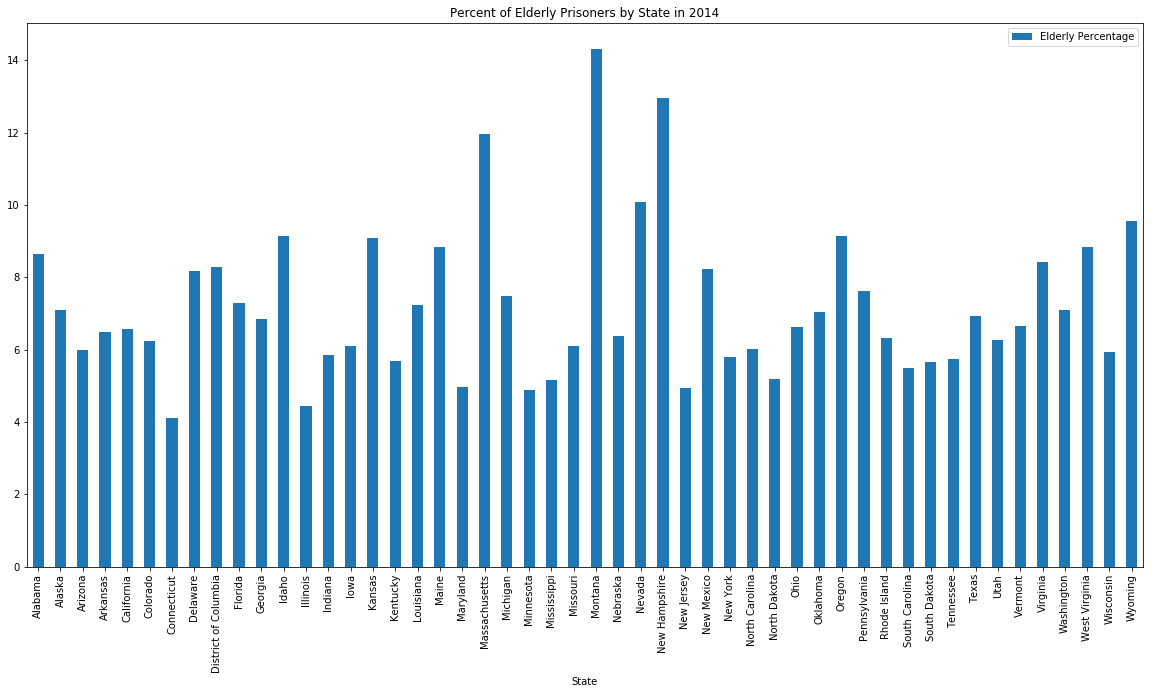

In [30]:
tempdf = tempdf[['State', 'Elderly Percentage']]
print(tempdf)
#plt.figure(figsize=(20,10), dpi = 120)
tempdf.plot(kind = 'bar', x= 'State', y='Elderly Percentage', figsize=(20,10), title = "Percent of Elderly Prisoners by State in 2014")


In [31]:
tempdf = pd.DataFrame(tempdf)

tempdf

,State,Elderly Percentage
0,Alabama,8.655635
1,Alaska,7.103581
2,Arizona,5.982427
3,Arkansas,6.495716
4,California,6.559751
5,Colorado,6.250745
6,Connecticut,4.105119
7,Delaware,8.185739
8,District of Columbia,8.290254
9,Florida,7.278607


In [32]:
states = {
        'Alaska': 'AK',
        'Alabama': 'AL',
        'Arkansas': 'AR',
        'Arizona': 'AZ',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'District of Columbia': 'DC',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Guam': 'GU',
        'Hawaii': 'HI',
        'Iowa': 'IA',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Northern Mariana Islands': 'MP',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Virgin Islands': 'VI',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY'
}

tempdf['State abv'] = tempdf['State'].apply(lambda x: states.get(x))

tempdf

,State,Elderly Percentage,State abv
0,Alabama,8.655635,AL
1,Alaska,7.103581,AK
2,Arizona,5.982427,AZ
3,Arkansas,6.495716,AR
4,California,6.559751,CA
5,Colorado,6.250745,CO
6,Connecticut,4.105119,CT
7,Delaware,8.185739,DE
8,District of Columbia,8.290254,DC
9,Florida,7.278607,FL


In [33]:
#create map of percent over 55 by state
import plotly

for col in tempdf.columns:
    tempdf[col] = tempdf[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(255, 192, 203)'],[0.4, 'rgb(255, 145, 164)'],\
            [0.6, 'rgb(248, 131, 121)'],[0.8, 'rgb(250, 128, 114)'],[1.0, 'rgb(255, 0, 0)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = tempdf['State abv'],
        z = tempdf['Elderly Percentage'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percentage inmates 55+")
        ) ]

layout = dict(
        title = 'Percentage of elderly (55+) inmates by state, 2014',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
plotly.offline.plot({"data":data, "layout":layout},filename = 'percentold.html')

'file:///Users/ozdemirerdemir/Documents/GitHub/CS506Project/percentold.html'

In [36]:
elderlyPercent = []
for num in elderly:
    elderlyPercent.append(num * 100)
    
print(elderlyPercent)

avg = sum(elderlyPercent)/len(elderlyPercent)
print(avg)

[8.655635195588612, 7.103580681839364, 5.982426910870498, 6.495716358128884, 6.559751308848743, 6.250745095259422, 4.105119206829631, 8.185739194273653, 8.29025418681659, 7.278606749341172, 6.848097354012689, 9.148220126084277, 4.435895754555456, 5.853951890034365, 6.094149901349414, 9.09731280980955, 5.691005156279839, 7.2439667658841636, 8.830436824800376, 4.956881963529045, 11.948246537620474, 7.471383945964289, 4.8960256681902115, 5.160409599755615, 6.088547575795335, 14.306289006240998, 6.37634215104073, 10.0843626924454, 12.964880896337444, 4.938920820559205, 8.219699186516065, 5.797291060582335, 6.026169853222531, 5.1998303826990355, 6.621377670442609, 7.031593128999663, 9.133963771290164, 7.622968720251761, 6.328451882845189, 5.4994510581821, 5.667141808129238, 5.744699837496126, 6.92259721521171, 6.261764062158022, 6.6597626065482345, 8.43581409375733, 7.105992851533073, 8.827707768803768, 5.930082338941493, 9.563194623933834]
7.198849124992595
